# DATA 602 Assignment 11
# Dan Smilowitz
## Data Import & Sanitation

In [1]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [2]:
aapl = pd.read_csv('data/apple.2011.csv', names=['Date', 'Price', 'Pct_Change'], header=0)
aapl.dtypes

Date           object
Price         float64
Pct_Change     object
dtype: object

In [3]:
# convert date to datetime from object
aapl['Date'] = pd.to_datetime(aapl['Date'], format='%m/%d/%Y')
# convert Pct_Change to float; covert 1st value to NA
aapl['Pct_Change'] = pd.to_numeric(aapl['Pct_Change'], errors='coerce')
aapl.dtypes

Date          datetime64[ns]
Price                float64
Pct_Change           float64
dtype: object

## Number Generator
### Use the percent change values to create a Gaussian random number generator

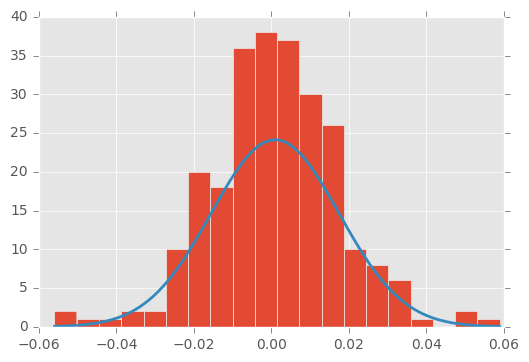

In [4]:
# calculate mean and standard deviation of Pct_Change
mu = aapl['Pct_Change'].mean()
sigma = aapl['Pct_Change'].std()
# plot histogram of values and normal distribution
plt.style.use('ggplot')
plt.hist(aapl['Pct_Change'].dropna(), 20);
x = np.linspace(aapl['Pct_Change'].min(), aapl['Pct_Change'].max(), 100)
y = 1.0/np.sqrt(2*np.pi*sigma**2)*np.exp(-0.5*(x-mu)**2/sigma**2)
plt.plot(x, y, lw=2.0)
# create function to return n samples from Gaussian with (mu, sigma)
def aapl_gauss(n):
    return np.random.normal(mu, sigma, n)

#### With that generator, create 20 random numbers

In [5]:
my_pct = aapl_gauss(20)

### Start with the price from the last row to determine a hypothetical price after 20 days

In [6]:
# get final price
price = aapl['Price'].iloc[-1]
# multiply price by percent change
for dy in xrange(20):
    price = price * (1 + my_pct[dy])
print 'After 20 days, the simulated price is $%.2f.' %price

After 20 days, the simulated price is $356.79.


## Value at Risk
### Repeat above 10,000 times

numpy.ndarray

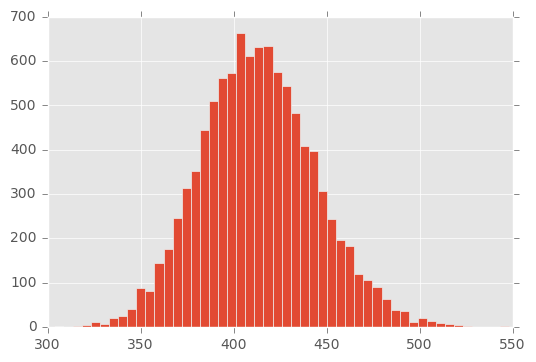

In [7]:
# initialize empty np array for memory savings
sims = np.empty(10000)
for i in xrange(10000):
    # get final price & random numbers
    price = aapl['Price'].iloc[-1]
    my_pct = aapl_gauss(20)
    # get simulated price
    for dy in xrange(20):
        price = price * (1 + my_pct[dy])
    # store result
    sims[i] = price
# plot histogram of results
plt.hist(sims, 50);

### Take all of the stored prices, sort them, and find the 1% lowest percentile

In [8]:
sims = sims.argsort()
VaR = np.percentile(sims, 1)
print 'With 99%% confidence, the Value at Risk is $%.2f.' %VaR

With 99% confidence, the Value at Risk is $99.99.
